In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px



In [2]:
# Настройка seaborn для таблицы
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(20,7)}
)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
ads = pd.read_csv('ads_data.csv')


Посмотрим на данные

In [5]:
ads

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [6]:
ads.event.isna().sum()

0

In [7]:
pd.to_datetime(ads.date)

0        2019-04-01
1        2019-04-01
2        2019-04-01
3        2019-04-01
4        2019-04-01
            ...    
999995   2019-04-05
999996   2019-04-05
999997   2019-04-05
999998   2019-04-05
999999   2019-04-05
Name: date, Length: 1000000, dtype: datetime64[ns]

Посчитаем среднее количество показов и среднее количество кликов на объявления за весь период

In [8]:
mean_per_ad = ads.groupby(['ad_id', 'event'], as_index=False) \
                   .agg({'time': 'count'}) \
                   .rename(columns={'time': 'quantity'}) \

mean_per_ad

,ad_id,event,quantity
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [9]:
# Преобразуем в сводную таблицу
pivot_events_per_ad = mean_per_ad.pivot(index='ad_id', columns='event', values='quantity') \
                   .fillna(0).reset_index().astype('int') \
                   
pivot_events_per_ad

event,ad_id,click,view
0,2,1,101
1,3,3,184
2,1902,1,41
3,2064,0,35
4,2132,1,58
...,...,...,...
960,122004,4,100
961,122013,0,156
962,122023,0,68
963,122031,1,138


In [10]:
pivot_events_per_ad.mean().round(0)

event
ad_id    57971.0
click      113.0
view       923.0
dtype: float64

In [11]:
mean_per_ad.dtypes

ad_id        int64
event       object
quantity     int64
dtype: object

In [12]:
# Альтернативный вариант
ads.groupby('event').agg({'time':'count'}).div(ads.ad_id.nunique()).round()

,time
event,
click,113.0
view,923.0


Построим график распределения показов на объявление за весь период

In [13]:
views_per_ad = mean_per_ad.query('event == "view"')
views_per_ad

,ad_id,event,quantity
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58
...,...,...,...
1475,122004,view,100
1476,122013,view,156
1477,122023,view,68
1479,122031,view,138


<AxesSubplot:xlabel='quantity', ylabel='Density'>

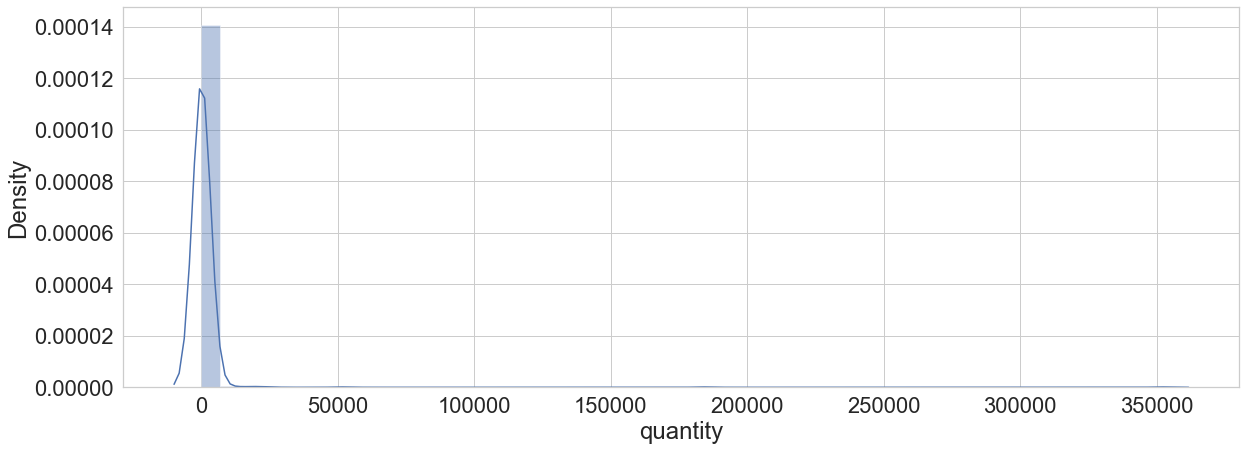

In [14]:
sns.distplot(views_per_ad.quantity)

In [15]:
views_per_ad.quantity.describe()

count       956.000000
mean        931.822176
std       13006.492754
min          10.000000
25%          36.000000
50%          84.000000
75%         209.250000
max      351802.000000
Name: quantity, dtype: float64

In [16]:
views_per_ad.quantity.isna().sum()

0

Что бы улучшить визуально график для понимания можно прологарифмировать(лог шкалирование) данные(когда есть выбросы)

In [17]:
import numpy as np

In [18]:
views_per_ad['log'] = np.log(views_per_ad.quantity)
views_per_ad.log.describe()

count    956.000000
mean       4.597903
std        1.330069
min        2.302585
25%        3.583519
50%        4.430817
75%        5.343528
max       12.770824
Name: log, dtype: float64

<AxesSubplot:xlabel='log', ylabel='Density'>

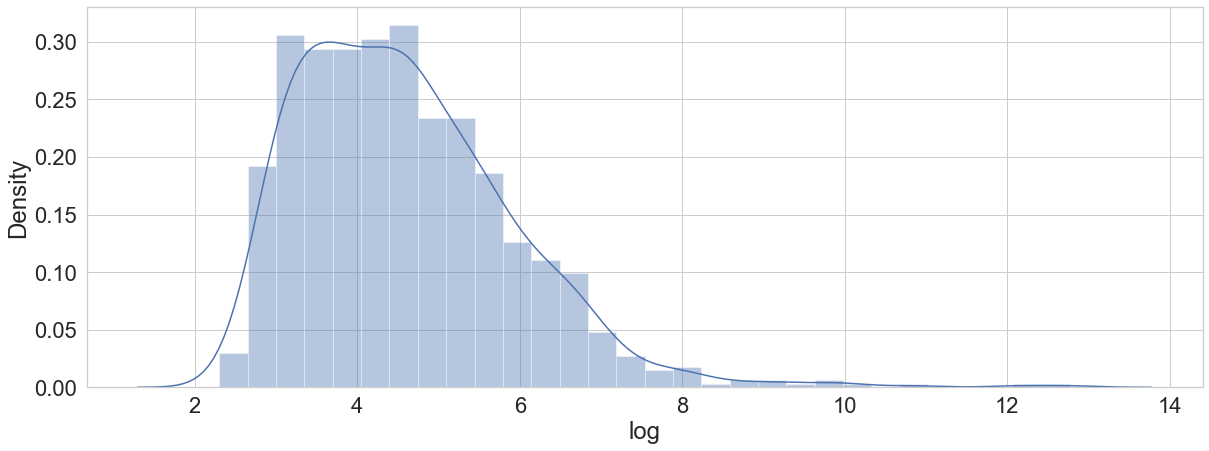

In [19]:
sns.distplot(views_per_ad.log)

А теперь посчитаем среднее значение показов, а по ним уже скользящее среднее показов с окном 2.
Узнаем какое значение скользящего среднего получим за 6 апреля 2019 года

In [20]:
ads_views_date = ads.query('event == "view"') \
                    .pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')

In [21]:
ads_views_date 

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [22]:
ads_views_date['2019-04-01'].rolling(2).mean().sort_values()

ad_id
45864     25.5
42178     27.0
99019     43.5
41008     63.0
120109    63.0
          ... 
122004     NaN
122013     NaN
122023     NaN
122031     NaN
122078     NaN
Name: 2019-04-01, Length: 956, dtype: float64

In [23]:
ads_views_date['2019-04-01'].mean()

154.4822695035461

In [24]:
rolling_views = ads_views_date.mean().rolling(2).mean().round(0)
rolling_views

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [25]:
ads_views_date.mean().rolling(2).mean()['2019-04-06'].round()

598.0

Используем скользящее среднее для поиска аномалий в данных. 
Нанесем на один график значения арифметического среднего по дням и скользящего среднего количества показов. 
Посмотрим в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним
(Дни, в которых скользящее среднее равно NaN, не учитываем)


In [26]:
mean_views = ads_views_date.mean()
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

<AxesSubplot:xlabel='date'>

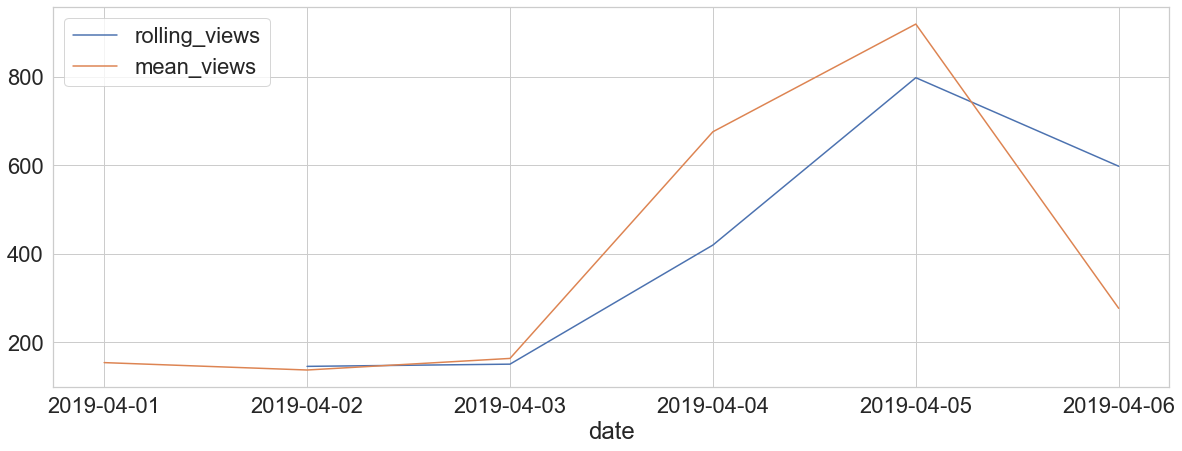

In [27]:
sns.lineplot(data=rolling_views, label='rolling_views')
sns.lineplot(data=mean_views, label='mean_views')


In [28]:
anomaly_day = (mean_views - rolling_views).abs().idxmax()
anomaly_day

'2019-04-06'

Напишем функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, 
 в который была замечена самая большая по модулю аномалия. 


In [29]:


def anomaly(table_dates):
    #Рассчитать среднее и скольз среднее
    
    mean_views = table_dates.mean()
    rolling_views = table_dates.mean().rolling(2).mean()
    
    # Найти дату с аномалией
    anomaly_day = mean_views.subtract(rolling_views).abs().idxmax()
    
    # Найти знак (Значение  по ключу даты)
    difference_value = mean_views.subtract(rolling_views)[anomaly_day]
    
    # Найти максимальное значение показов
    if difference_value <= 0:
        anomaly_ad_id = table_dates[anomaly_day].idxmax()
        
     # Найти максимальное значение показов
    else:
        anomaly_ad_id = table_dates[anomaly_day].idxmin()
        
    return anomaly_ad_id
    

In [30]:
anomaly(ads_views_date)

112583

In [31]:
difference_value = (mean_views - rolling_views)[anomaly_day]
difference_value

-320.8772727272727

In [32]:
ads_views_date[anomaly_day].sort_values(ascending=False)

ad_id
112583    48991.0
28142      3280.0
38892      1337.0
37720       835.0
18425       426.0
           ...   
121964        NaN
122004        NaN
122013        NaN
122023        NaN
122078        NaN
Name: 2019-04-06, Length: 956, dtype: float64

Теперь подгрузим данные по рекламным клиентам 

In [33]:
ads_client = pd.read_csv('ads_clients_data.csv')

In [34]:
ads_client

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


Обьеденим два датафрейма по client_union_id и удалим ненужные столбцы 

In [35]:
ads_client_full = ads.merge(ads_client.drop(columns=['community_id', 'date']))

In [36]:
ads_client_full

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2019-03-04
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2019-03-04
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2019-03-04
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2019-03-04


Приведем колонки с датой к соответствующему формату 

In [37]:
ads_client_full[['date', 'create_date']] = ads_client_full[['date', 'create_date']].apply(pd.to_datetime)

Найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [38]:
# Создадим функцию для вычисления минимальной разницы(так как нам нужна дата первого запуска)
def find_min_diff(group):
    diff = group.date - group.create_date
    return diff.min()

In [39]:
ads_client_full.groupby('client_union_id').apply(find_min_diff).mean()

Timedelta('124 days 09:04:43.532219570')

Вычислим конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней.
(Фильтровать будем по значению в формате pd.Timedelta(365, unit='d'))

In [40]:
# Создаем условие для фильтрации даты ( не более 365 дней)
condition = pd.to_timedelta(365, unit='d')

In [41]:
creat_diff = ads_client_full.groupby('client_union_id').apply(find_min_diff)

In [42]:
# Фильтруем по условию
creat_diff = creat_diff.loc[creat_diff < condition]

In [43]:
round(creat_diff.shape[0] / ads_client.client_union_id.nunique() * 100, 2)

0.69

Разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30.
Определим, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней)
(Список промежутков для метода pd.cut – [0, 30, 90, 180, 365])

In [44]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='d')

In [45]:
creat_diff_groups = pd.cut(creat_diff, bins=bins, labels=['0-30','30-90', '90-180', '180-365']).value_counts()

А теперь выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [48]:
px.bar(creat_diff_groups)
